<a href="https://colab.research.google.com/github/antoreep-jana/YouTube_Code_Repositories/blob/main/Weekly%20Sessions/Weekly_Session__15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using EfficientNetV2

In [ ]:
!git clone https://github.com/google/automl.git

import sys
sys.path.insert(0,'/content/automl/efficientnetv2')


Cloning into 'automl'...
remote: Enumerating objects: 3993, done.
remote: Counting objects: 100% (380/380), done.
remote: Compressing objects: 100% (195/195), done.
remote: Total 3993 (delta 224), reused 294 (delta 183), pack-reused 3613
Receiving objects: 100% (3993/3993), 25.16 MiB | 22.70 MiB/s, done.
Resolving deltas: 100% (2976/2976), done.


In [ ]:
!pip install tensorflow-addons

     |████████████████████████████████| 1.1 MB 4.2 MB/s 


In [ ]:
import tensorflow as tf
import effnetv2_model

In [ ]:
img_size = 480
input_layer = tf.keras.layers.Input(shape = (img_size, img_size, 3))

effnetv2_l = effnetv2_model.get_model('efficientnetv2-l' , include_top=True, weights = 'imagenet21k-ft1k')



1711931392/1711922895 [==============================] - 35s 0us/step
Instructions for updating:
Restoring a name-based tf.train.Saver checkpoint using the object-based restore API. This mode uses global names to match variables, and so is somewhat fragile. It also adds new restore ops to the graph each time it is called when graph building. Prefer re-encoding training checkpoints in the object-based format: run save() on the object-based saver (the same one this message is coming from) and use that checkpoint in the future.


Instructions for updating:
Restoring a name-based tf.train.Saver checkpoint using the object-based restore API. This mode uses global names to match variables, and so is somewhat fragile. It also adds new restore ops to the graph each time it is called when graph building. Prefer re-encoding training checkpoints in the object-based format: run save() on the object-based saver (the same one this message is coming from) and use that checkpoint in the future.


NameError: ignored

In [ ]:
effnetv2_l.__setattr__('build', effnetv2_l.call)


model = tf.keras.models.Sequential([
                                    input_layer, 
                                    effnetv2_l
])





model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetv2-l (EffNetV2Mo (None, 1000)              119027848 
Total params: 119,027,848
Trainable params: 118,515,272
Non-trainable params: 512,576
_________________________________________________________________


Understanding Parameters of XGBoost

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
import numpy as np

In [ ]:
from xgboost import XGBClassifier

In [ ]:
model = XGBClassifier()

model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
rng = np.random.RandomState(31337)

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
digits = load_digits(n_class = 2)

In [ ]:
y = digits['target']
X = digits['data']

In [ ]:
X.shape

(360, 64)

In [ ]:
y.shape

(360,)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [ ]:
Kf = KFold(n_splits = 3, shuffle = True, random_state = 2021)

In [ ]:
for idx, (trn_idx, test_idx) in enumerate(Kf.split(X, y)):
  print("\n\nFold # ", idx)

  x_train, y_train = X[trn_idx], y[trn_idx]


  x_test, y_test = X[test_idx],y[test_idx]

  model = XGBClassifier()
  model.fit(x_train, y_train)
  
  print("model trained")

  predictions = model.predict(x_test)

  print(accuracy_score(y_test, predictions))

  #print(trn_idx, test_idx)



Fold #  0
model trained
1.0


Fold #  1
model trained
1.0


Fold #  2
model trained
0.9916666666666667


In [ ]:
!pip -q install optuna
import optuna

In [ ]:
def objective(trial, data = X, target = y):
  
  X_train, X_test, y_train, y_test = train_test_split(data, target, random_state = 2021, test_size = 0.25)

  params = {
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.008,0.009,0.01,0.012,0.014,0.016,0.018, 0.02]),
        'n_estimators': trial.suggest_categorical('n_estimators', [100, 200, 300, 400, 500]),
        'max_depth': trial.suggest_categorical('max_depth', [5,7,9,11,13,15,17,20]),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
    }

  model = XGBClassifier(**params)

  model.fit(X_train, y_train)

  predictions = model.predict(X_test)

  loss = log_loss(y_test, predictions)

  return loss

In [ ]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=150)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2021-09-19 11:16:44,842] A new study created in memory with name: no-name-480f44c4-4969-4561-89cd-79e548e49bd8
[I 2021-09-19 11:16:44,892] Trial 0 finished with value: 18.421107195915134 and parameters: {'lambda': 0.2752068799694041, 'alpha': 3.376649621756919, 'colsample_bytree': 0.9, 'subsample': 0.7, 'learning_rate': 0.016, 'n_estimators': 100, 'max_depth': 13, 'min_child_weight': 48}. Best is trial 0 with value: 18.421107195915134.
[I 2021-09-19 11:16:45,064] Trial 1 finished with value: 18.421107195915134 and parameters: {'lambda': 0.018774479197045325, 'alpha': 0.00527091717142004, 'colsample_bytree': 0.9, 'subsample': 0.7, 'learning_rate': 0.009, 'n_estimators': 500, 'max_depth': 15, 'min_child_weight': 214}. Best is trial 0 with value: 18.421107195915134.
[I 2021-09-19 11:16:45,105] Trial 2 finished with value: 18.421107195915134 and parameters: {'lambda': 0.0018252771976919012, 'alpha': 0.005836568140621485, 'colsample_bytree': 0.5, 'subsample': 0.4, 'learning_rate': 0.01, 

Number of finished trials: 150
Best trial: {'lambda': 0.31617408836889066, 'alpha': 8.609951841634205, 'colsample_bytree': 0.8, 'subsample': 0.6, 'learning_rate': 0.008, 'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 3}


In [ ]:
best_params = {'lambda': 0.31617408836889066, 'alpha': 8.609951841634205, 'colsample_bytree': 0.8, 'subsample': 0.6, 'learning_rate': 0.008, 'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 3}

In [ ]:
model = XGBClassifier(**best_params)

In [ ]:
for idx, (trn_idx, test_idx) in enumerate(Kf.split(X, y)):
  print("\n\nFold # ", idx)

  x_train, y_train = X[trn_idx], y[trn_idx]


  x_test, y_test = X[test_idx],y[test_idx]

  model = XGBClassifier(**best_params)
  model.fit(x_train, y_train)
  
  print("model trained")

  predictions = model.predict(x_test)

  print(accuracy_score(y_test, predictions))

  #print(trn_idx, test_idx)



Fold #  0
model trained
1.0


Fold #  1
model trained
0.9833333333333333


Fold #  2
model trained
0.9916666666666667


Implementation AutoEncoders

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import tensorflow as tf 

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split 
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist 
from tensorflow.keras.models import Model



In [ ]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [ ]:
def noise(array, factor = 0.3):

  noisy_array = array + factor * np.random.normal(loc = 0, scale = 1.0, size = array.shape)

  return np.clip(noisy_array, 0.0, 1.0)


def display_grid(array1, array2, n = 10):

  w = 10
  h = 10
  fig = plt.figure(figsize=(15, 15))
  columns = 10
  rows = 2
  
  indices = np.random.randint(len(array1), size=11)
  images1 = array1[indices, :]
  images2 = array2[indices, :]

  for i in range(1, 10 + 1):
    img = images1[i]
    fig.add_subplot(rows,columns, i)
    plt.imshow(img)
  #plt.show()

  for i in range(11, 20 + 1):
    img = images2[i - 10]
    fig.add_subplot(rows,columns, i)
    plt.imshow(img)
  plt.show()



In [ ]:
x_train=x_train.reshape(60000, 28, 28, 1)
x_train.shape

(60000, 28, 28, 1)

In [ ]:
x_test = x_test.reshape(10000, 28, 28, 1)
x_test.shape

(10000, 28, 28, 1)

In [ ]:
class AutoEncoder(tf.keras.Model):

  def __init__(self, input_shape = (28,28,1)):

    super(AutoEncoder, self).__init__()
    self.input_ = input_shape

    self.encoder = tf.keras.models.Sequential([
                                               tf.keras.layers.Conv2D(32, (3,3), input_shape = self.input_,  padding = 'same', activation='relu' ),
                                               tf.keras.layers.MaxPooling2D((2,2), padding = 'same'),
                                               tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', padding = 'same'),
                                               tf.keras.layers.MaxPooling2D((2,2), padding = 'same')
    ])

    self.decoder = tf.keras.models.Sequential([
              tf.keras.layers.Conv2DTranspose(32, (3,3), strides = 2, padding = 'same', activation='relu'), 
              tf.keras.layers.Conv2DTranspose(32, (3,3), strides = 2, padding = 'same', activation = 'relu'),
              tf.keras.layers.Conv2D(1, (3,3), padding='same', activation='sigmoid')                                         
    ])


  def call(self,x):

    x = self.encoder(x)
    x = self.decoder(x)

    return x

In [ ]:
autoencoder = AutoEncoder()

In [ ]:
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy')

In [ ]:
autoencoder.fit(
    x = x_train, 
    y = x_train, 
    batch_size = 128, 
    epochs = 50, 
    
    validation_data = (x_test, x_test))

Epoch 1/50
469/469 [==============================] - 35s 17ms/step - loss: 0.3027 - val_loss: 0.2729
Epoch 2/50
469/469 [==============================] - 7s 15ms/step - loss: 0.2669 - val_loss: 0.2657
Epoch 3/50
469/469 [==============================] - 7s 15ms/step - loss: 0.2611 - val_loss: 0.2613
Epoch 4/50
469/469 [==============================] - 7s 15ms/step - loss: 0.2579 - val_loss: 0.2588
Epoch 5/50
469/469 [==============================] - 7s 15ms/step - loss: 0.2560 - val_loss: 0.2574
Epoch 6/50
469/469 [==============================] - 7s 15ms/step - loss: 0.2548 - val_loss: 0.2563
Epoch 7/50
469/469 [==============================] - 7s 15ms/step - loss: 0.2539 - val_loss: 0.2556
Epoch 8/50
469/469 [==============================] - 7s 15ms/step - loss: 0.2532 - val_loss: 0.2549
Epoch 9/50
469/469 [==============================] - 7s 15ms/step - loss: 0.2526 - val_loss: 0.2545
Epoch 10/50
469/469 [==============================] - 7s 15ms/step - loss: 0.2522 - val_l

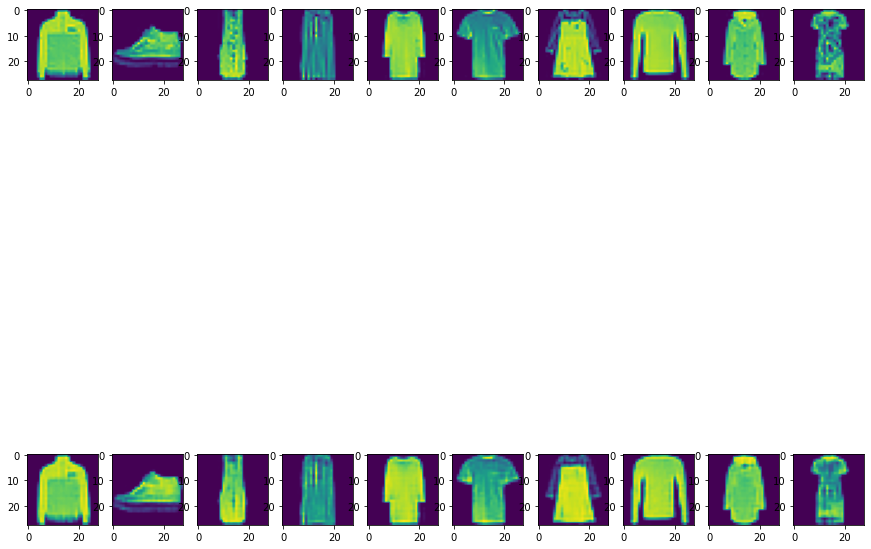

In [ ]:
predictions = autoencoder.predict(x_test)

display_grid(x_test.squeeze(), predictions.squeeze())

### Denoising with AutoEncoders

In [ ]:
noisy_train = noise(x_train)

noisy_test = noise(x_test)

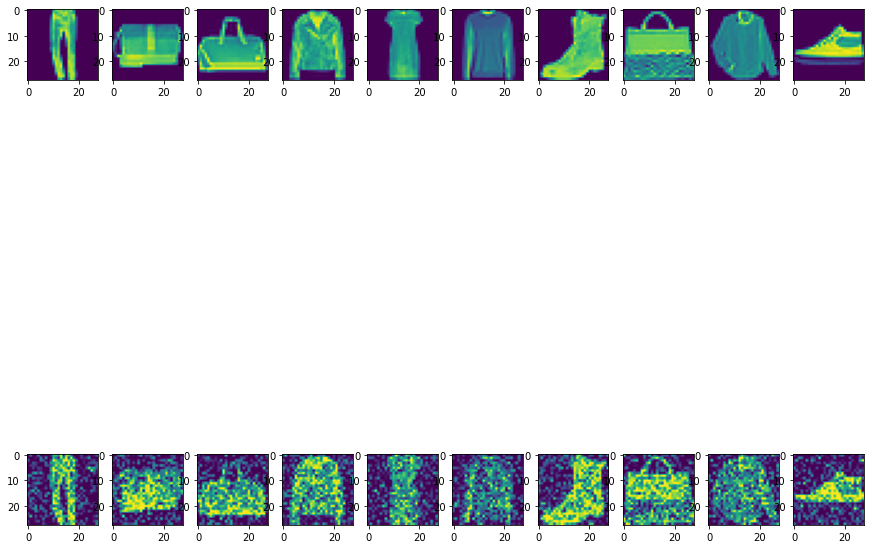

In [ ]:
# visualize 

display_grid(x_train.squeeze(), noisy_train.squeeze())

In [ ]:
autoencoder.fit(x = noisy_train, 
                y = x_train, 
                
                epochs = 50, batch_size = 128, 
                
                validation_data = (noisy_test, x_test))

Epoch 1/50
469/469 [==============================] - 7s 16ms/step - loss: 0.2827 - val_loss: 0.2800
Epoch 2/50
469/469 [==============================] - 7s 15ms/step - loss: 0.2767 - val_loss: 0.2782
Epoch 3/50
469/469 [==============================] - 7s 16ms/step - loss: 0.2755 - val_loss: 0.2773
Epoch 4/50
469/469 [==============================] - 7s 15ms/step - loss: 0.2748 - val_loss: 0.2765
Epoch 5/50
469/469 [==============================] - 7s 15ms/step - loss: 0.2742 - val_loss: 0.2762
Epoch 6/50
469/469 [==============================] - 7s 15ms/step - loss: 0.2739 - val_loss: 0.2758
Epoch 7/50
469/469 [==============================] - 7s 15ms/step - loss: 0.2735 - val_loss: 0.2755
Epoch 8/50
469/469 [==============================] - 7s 15ms/step - loss: 0.2732 - val_loss: 0.2752
Epoch 9/50
469/469 [==============================] - 7s 15ms/step - loss: 0.2730 - val_loss: 0.2751
Epoch 10/50
469/469 [==============================] - 7s 15ms/step - loss: 0.2728 - val_lo

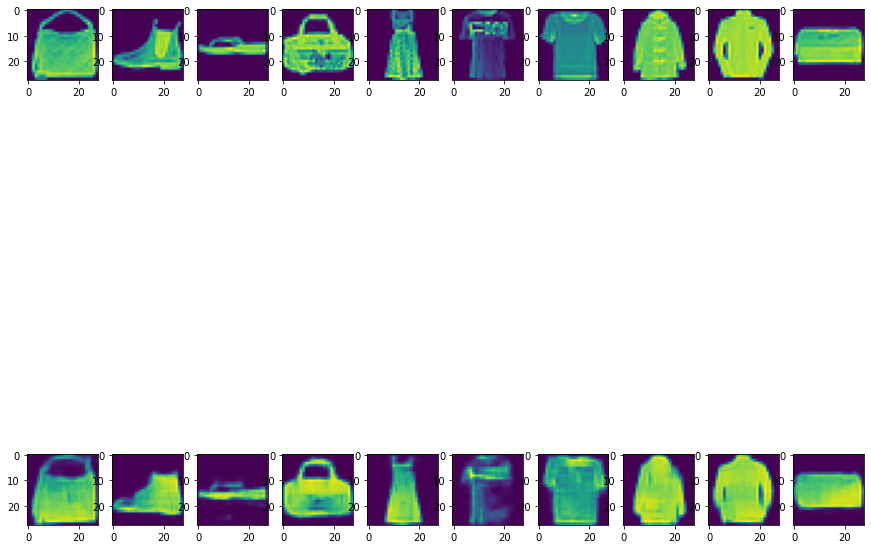

In [ ]:
predictions = autoencoder.predict(noisy_test)

display_grid(x_test.squeeze(), predictions.squeeze())

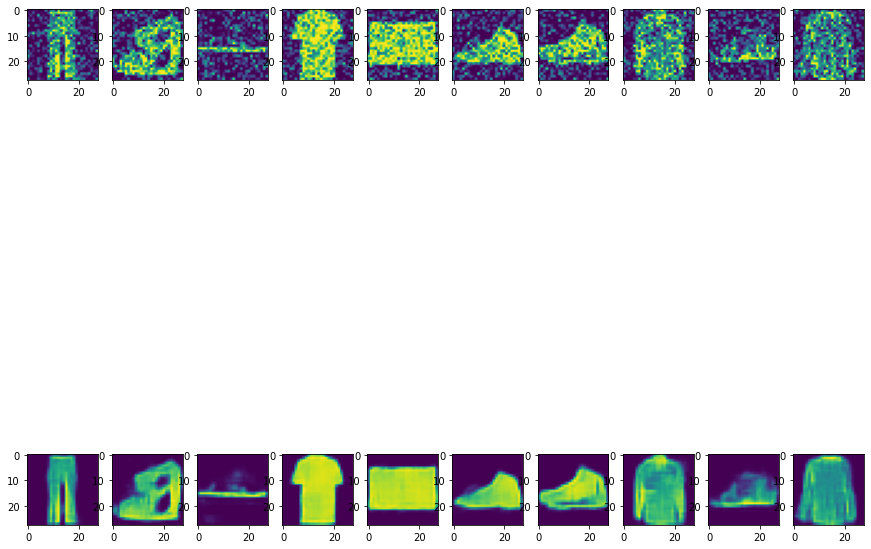

In [ ]:
display_grid(noisy_test.squeeze(), predictions.squeeze())